## My N-Gram Model
Create a smart keyboard that predicts next word based on previous word(s)

In [117]:
#meta: 8/4/2018
#started like iSchool DS3A3, but redoing with NLTK package, easier to tokenize and n-grams

In [118]:
import time
import numpy as np
import re #for regex and pattern matching
import matplotlib.pyplot as plt #for drawing plots
%matplotlib inline

#NLP libraries
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter #for document-term counting

#not used
#import pandas as pd #for data structures
#from nltk import word_tokenize

### Terms in Corpus

In [119]:
### start clock
start_time=time.time()

In [120]:
#--get individual words

#was 
#words_twitter = re.findall(r'\w+', open('sampleData/en_US.twitter_small.txt').read().lower()) #return type list

#get rid of punctuation
#  re explanation: 
#  refer to https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string-in-python
#  replaces not (^) word characters or spaces with the empty string. 
#  Be careful though, the \w matches underscore too usually for example
# originally was
#   words_news = re.sub(r'[^\w\s]','',open('sampleData/en_US.news_small.txt').read().lower())
#get rid of numbers too
words_twitter = re.sub(r'[^\w\s]|[\d]','',open('sampleData/en_US.twitter_small.txt').read().lower())
words_news = re.sub(r'[^\w\s]|[\d]','',open('sampleData/en_US.news_small.txt').read().lower())

#get individual words into a list
words_twitter = re.findall(r'\w+', words_twitter) #return type list
words_news = re.findall(r'\w+', words_news) #return type list

In [121]:
#combine all words
#  $performance: 11.extend(l2) 0.43836308320363365 vs. l1+l2 in 2.32153955300649 
##  words_all = words_twitter + words_news #works but not efficient

words_all = words_twitter.copy()
words_all.extend(words_news)

In [122]:
#validate counts
print ('Twitter words', len(words_twitter))
print ('News words', len(words_news))
print ('All words', len(words_all))


Twitter words 294
News words 309
All words 603


In [123]:
vectorizer = CountVectorizer(ngram_range=(1,2))               
dtm = vectorizer.fit_transform(words_all)  # a sparse matrix 

vocab_list = vectorizer.get_feature_names()


In [124]:
### stop clock
end_time=time.time()
print('Loaded all words in ', (end_time - start_time)/ 60 )

Loaded all words in  0.003279554843902588


In [125]:
type(dtm)
len(vocab_list)

380

In [126]:
### stop clock
end_time=time.time()
print('Loaded all words in ', (end_time - start_time)/ 60 )



Loaded all words in  0.003903019428253174


In [127]:
vocab_list

['absolutely',
 'accessing',
 'according',
 'accountability',
 'action',
 'again',
 'age',
 'ago',
 'alaimo',
 'alchemy',
 'all',
 'alone',
 'always',
 'americans',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyone',
 'anytime',
 'apparently',
 'applauded',
 'are',
 'around',
 'at',
 'atlantic',
 'attempts',
 'attention',
 'auctions',
 'automotive',
 'band',
 'be',
 'beat',
 'beauty',
 'became',
 'been',
 'before',
 'begin',
 'better',
 'bill',
 'billion',
 'biomedical',
 'birthday',
 'block',
 'blog',
 'both',
 'boy',
 'brainstorming',
 'brings',
 'btw',
 'building',
 'but',
 'by',
 'cali',
 'called',
 'campaign',
 'carrying',
 'cars',
 'casino',
 'catch',
 'center',
 'certain',
 'charlevoix',
 'check',
 'christie',
 'city',
 'close',
 'come',
 'commercial',
 'committee',
 'complete',
 'conservative',
 'contract',
 'contributions',
 'coo',
 'correct',
 'cps',
 'cubs',
 'dammnnnnn',
 'day',
 'dc',
 'decided',
 'definitely',
 'deplored',
 'desk',
 'detroit',
 'die',
 'difficult',
 

In [128]:
### stop clock
end_time=time.time()
print('Loaded all words in ', (end_time - start_time)/ 60 )

Loaded all words in  0.0045506000518798825


In [129]:
words_subset = words_all.copy() #words_all[:10000].copy()
len(words_subset)
#words_subset[:5]

603

In [130]:
#tokenize
from nltk.util import ngrams
#https://stackoverflow.com/questions/32441605/generating-ngrams-unigrams-bigrams-etc-from-a-large-corpus-of-txt-files-and-t

token = words_all
bigrams = ngrams(token,2)
trigrams = ngrams(token,3)
#fourgrams = ngrams(token,4)

In [131]:
#preview unigrams counter object
#$acissue - looks like lost 1 letter words - $accomeback
counter_uni = Counter(ngrams(token,1))
counter_uni

Counter({('how',): 2,
         ('are',): 1,
         ('you',): 4,
         ('btw',): 1,
         ('thanks',): 1,
         ('for',): 11,
         ('the',): 34,
         ('rt',): 2,
         ('gonna',): 1,
         ('be',): 1,
         ('in',): 13,
         ('dc',): 1,
         ('anytime',): 1,
         ('soon',): 2,
         ('love',): 2,
         ('to',): 25,
         ('see',): 1,
         ('been',): 2,
         ('way',): 2,
         ('too',): 1,
         ('long',): 3,
         ('when',): 3,
         ('meet',): 1,
         ('someone',): 1,
         ('special',): 1,
         ('youll',): 2,
         ('know',): 1,
         ('your',): 3,
         ('heart',): 1,
         ('will',): 2,
         ('beat',): 1,
         ('more',): 4,
         ('rapidly',): 1,
         ('and',): 8,
         ('smile',): 1,
         ('no',): 2,
         ('reason',): 1,
         ('theyve',): 1,
         ('decided',): 2,
         ('its',): 3,
         ('fun',): 1,
         ('if',): 2,
         ('i',): 6,
         ('

A Counter is a dict subclass for counting hashable objects. It is an unordered collection where elements are stored as dictionary keys and their counts are stored as dictionary values

https://docs.python.org/3/library/collections.html#collections.Counter

In [132]:
### word frequency in corpus, using Collectins.Counter objec

cusswords = ['fuck']
#create corpus dictionary - term and frequency
corpus_dict = Counter(term for term in words_subset if term not in cusswords)  # type collections.Counter

#store total count of terms in corpus
corpus_terms_total= sum(corpus_dict.values())
print ("Total terms in corpus: ", corpus_terms_total, " unique: ", len(corpus_dict.values()))

Total terms in corpus:  603  unique:  386


In [133]:
#preview corpus_dict
corpus_dict['the']
#verify no profanity words
corpus_dict['fuck']

corpus_dict.most_common(10) #return type list

[('the', 34),
 ('to', 25),
 ('a', 17),
 ('in', 13),
 ('for', 11),
 ('it', 9),
 ('and', 8),
 ('of', 8),
 ('i', 6),
 ('is', 6)]

In [134]:
#least common
#code per reference: corpus_dict.most_common()[:-10-1:-1]
corpus_dict.most_common()[-10:] #mine, simpler

[('submitting', 1),
 ('fraudulent', 1),
 ('invoices', 1),
 ('or', 1),
 ('block', 1),
 ('accessing', 1),
 ('inappropriate', 1),
 ('websites', 1),
 ('were', 1),
 ('place', 1)]

(array([353.,  22.,   1.,   2.,   3.,   0.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  2.65,  4.3 ,  5.95,  7.6 ,  9.25, 10.9 , 12.55, 14.2 ,
        15.85, 17.5 , 19.15, 20.8 , 22.45, 24.1 , 25.75, 27.4 , 29.05,
        30.7 , 32.35, 34.  ]),
 <a list of 20 Patch objects>)

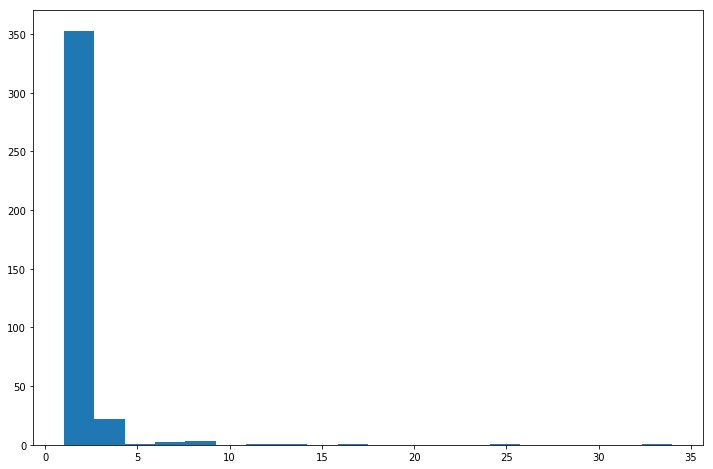

In [135]:
#plot 
plt.figure(figsize = (12,8))
plt.hist(corpus_dict.values(), bins = 20)

(array([318.,   0.,   0.,  35.,   0.,   0.,  15.,   7.,   0.,   1.,   2.,
          2.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   1.]),
 array([0.        , 0.17631803, 0.35263605, 0.52895408, 0.7052721 ,
        0.88159013, 1.05790816, 1.23422618, 1.41054421, 1.58686224,
        1.76318026, 1.93949829, 2.11581631, 2.29213434, 2.46845237,
        2.64477039, 2.82108842, 2.99740645, 3.17372447, 3.3500425 ,
        3.52636052]),
 <a list of 20 Patch objects>)

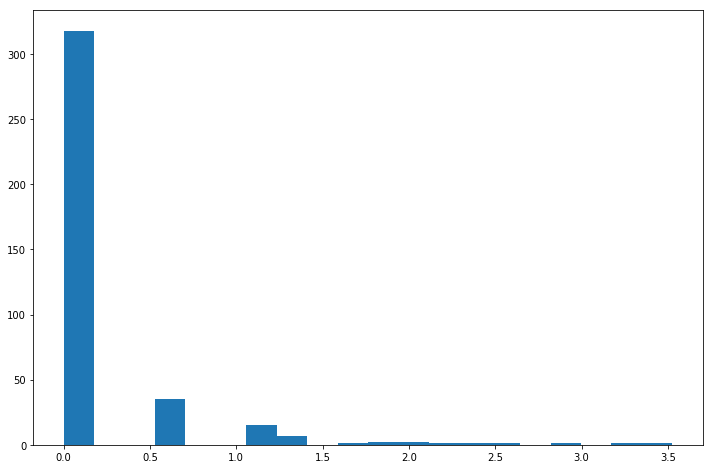

In [136]:
#plot log
#$code convert to dict_values to list
#list(corpus_dict.values()
plt.figure(figsize = (12,8))
plt.hist(np.log(list(corpus_dict.values())), bins = 20)

In [137]:
#check that cuss words got removed
corpus_dict['fuck']

0

### Maybe

In [116]:
"""filenames = ['myData/en_US.twitter.txt'] #,           
             #'myData/en_US.news.txt']      
                                                             
vectorizer = CountVectorizer(input='content') #, ngram_range=(1,2))               
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix 

vocab_list = vectorizer.get_feature_names()
"""

"filenames = ['myData/en_US.twitter.txt'] #,           \n             #'myData/en_US.news.txt']      \n                                                             \nvectorizer = CountVectorizer(input='content') #, ngram_range=(1,2))               \ndtm = vectorizer.fit_transform(filenames)  # a sparse matrix \n\nvocab_list = vectorizer.get_feature_names()\n"

### Xtra
copying from A3 Jargon

In [ ]:
### create a list of stopwords (ok to copy from file, per Jevin)
stopwords = ["all","just","being","over","both","through","yourselves","its","before","herself","had","should",
             "to","only","under","ours","has","do","them","his","very","they","not","during","now","him","nor","did",
             "this","she","each","further","where","few","because","doing","some","are","our","ourselves","out","what",
             "for","while","does","above","between","t","be","we","who","were","here","hers","by","on","about","of",
             "against","s","or","own","into","yourself","down","your","from","her","their","there","been","whom","too",
             "themselves","was","until","more","himself","that","but","don","with","than","those","he","me","myself",
             "these","up","will","below","can","theirs","my","and","then","is","am","it","an","as","itself","at","have",
             "in","any","if","again","no","when","same","how","other","which","you","after","most","such","why","a",
             "off","i","yours","so","the","having","once","null"]

In [ ]:
### word frequency in corpus, using Collectins.Counter object

#Remove all non-alpha characters 
terms_twitter = re.findall('\d*[a-z][a-z0-9]+', open('myData/en_US.twitter.txt').read().lower())
#terms = [re.sub('[0-9]','',s) for s in terms]

#create corpus dictionary - term and frequency
corpus_dict = Counter(term for term in terms_twitter if term not in stopwords)  # type collections.Counter

#store total count of terms in corpus
corpus_terms_total= sum(corpus_dict.values())
print ("Total terms in corpus: ", corpus_terms_total, " unique: ", len(corpus_dict.values()))

In [ ]:
### stop clock
end_time=time.time()
print('Loaded Twitter data in ', (end_time - start_time)/ 60 )

In [ ]:
### if wanted to use random
#create a random sample, for size-sake
sample_size = 50000
words_sample = np.random.sample(xrange(len(words)), sample_size)
len(words_sample)

In [ ]:
#$performance
#not efficient 7.64 min vs .50 min with words_twitter = re.findall(r'\w+', open('myData/en_US.twitter.txt').read().lower())

#twitter_tokens = word_tokenize(open("myData/en_US.twitter.txt").read().lower())
